<a href="https://colab.research.google.com/github/SiyandaCaddy/Data-Science-Application/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# STUDENT PERFORMANCE ANALYTICS


#import libraries
!pip install xgboost --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:

#Upload & merge datasets

print("Upload both CSV files: student-mat.csv and student-por.csv")
uploaded = files.upload()

# Read both
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

df_mat['subject'] = 'Math'
df_por['subject'] = 'Portuguese'
df = pd.concat([df_mat, df_por], ignore_index=True)

print("\nMerged dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Upload both CSV files: student-mat.csv and student-por.csv


Saving student-mat.csv to student-mat.csv
Saving student-por.csv to student-por.csv

Merged dataset shape: (1044, 34)
Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [3]:


#Create target variable (Pass/Fail)

# Automatically choose final-grade column (G3 → fallback G2)
target_col = 'G3' if 'G3' in df.columns else 'G2'
print(f"\nUsing '{target_col}' as the target variable.")

df['pass'] = df[target_col].apply(lambda x: 1 if x >= 10 else 0)
df = df.drop(columns=[target_col])


Using 'G3' as the target variable.


In [4]:

#Encode categorical features

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [5]:

#Train/Test split + scaling

X = df.drop('pass', axis=1)
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

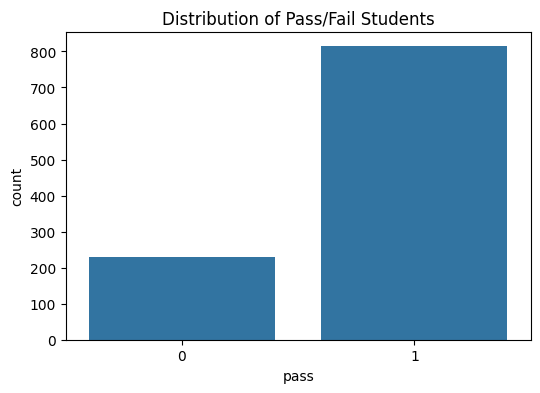

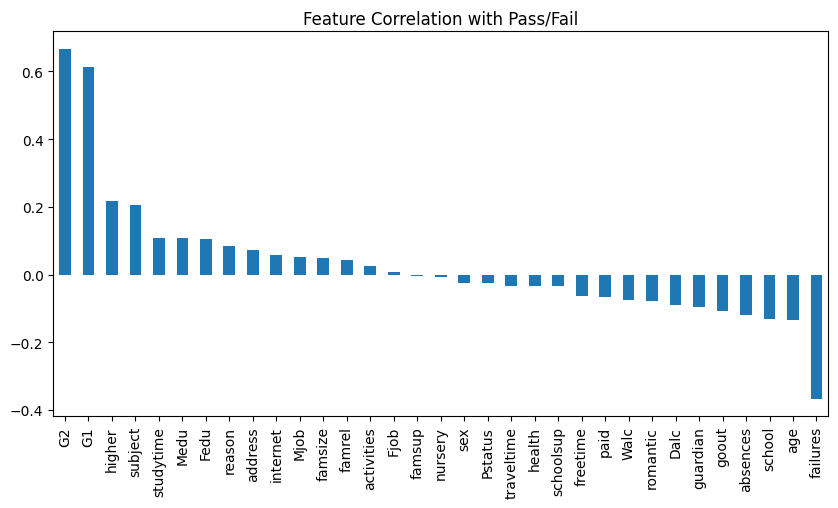

In [6]:

#Exploratory Data Analysis (EDA)

plt.figure(figsize=(6,4))
sns.countplot(x='pass', data=df)
plt.title('Distribution of Pass/Fail Students')
plt.show()

corr = pd.DataFrame(X, columns=df.drop('pass', axis=1).columns).corrwith(y)
corr.sort_values(ascending=False).plot(kind='bar', figsize=(10,5),
                                       title='Feature Correlation with Pass/Fail')
plt.show()

In [7]:

#Helper: model evaluation function

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy : {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-score : {f1:.2f}")
    print(f"ROC-AUC  : {auc:.2f}")
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                           display_labels=['Fail','Pass']).plot()
    plt.show()
    return acc


🔹 Logistic Regression
Accuracy : 0.92
Precision: 0.96
Recall   : 0.94
F1-score : 0.95
ROC-AUC  : 0.89


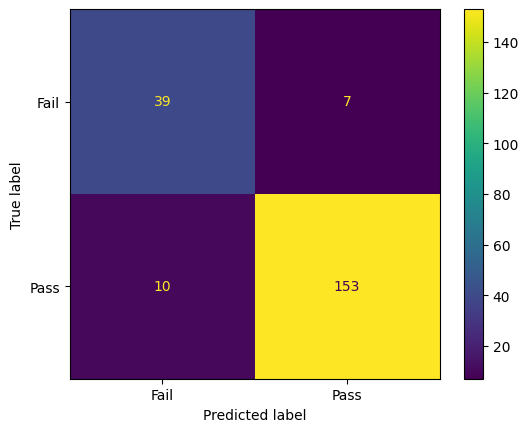


🔹 Random Forest
Accuracy : 0.90
Precision: 0.94
Recall   : 0.93
F1-score : 0.93
ROC-AUC  : 0.87


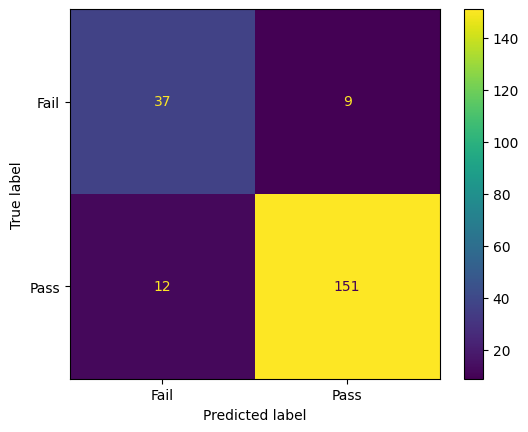


🔹 XGBoost
Accuracy : 0.90
Precision: 0.95
Recall   : 0.92
F1-score : 0.93
ROC-AUC  : 0.87


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:44:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


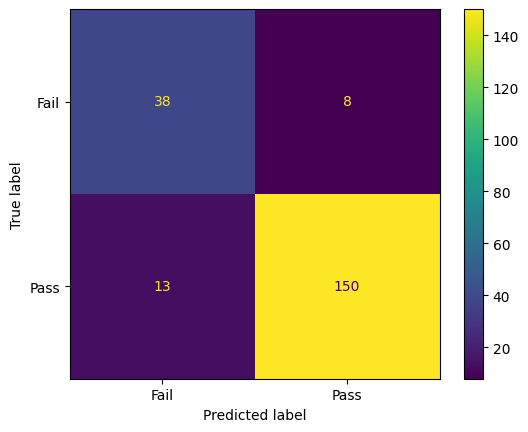

0.8995215311004785

In [8]:

#Train & evaluate models

print("\n🔹 Logistic Regression")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
evaluate(lr, X_test, y_test)

print("\n🔹 Random Forest")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
evaluate(rf, X_test, y_test)

print("\n🔹 XGBoost")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
evaluate(xgb, X_test, y_test)

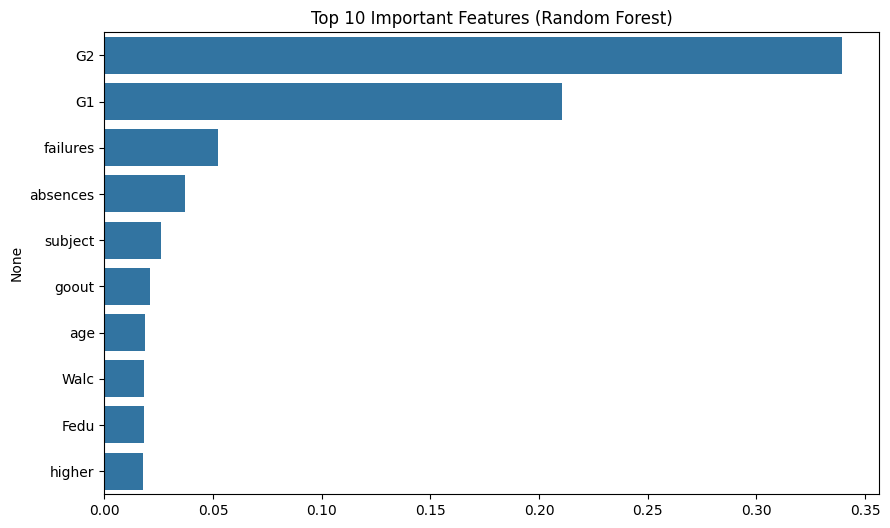


✅ Analysis complete!


In [9]:

#Feature importance (Random Forest)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.drop('pass', axis=1).columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

print("\n✅ Analysis complete!")

In [10]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [11]:

# 🎓 Fixed Interactive Student Performance Predictor

!pip install gradio --quiet
import gradio as gr
import pandas as pd
import numpy as np

# ✅ Ensure both df, rf, and scaler already exist (from training)
# Create reference template for all features
template_columns = list(df.drop('pass', axis=1).columns)

def predict_performance(studytime, failures, absences, fedu, medu, internet):
    # Step 1: Create a blank input matching training structure
    input_data = pd.DataFrame(np.zeros((1, len(template_columns))), columns=template_columns)

    # Step 2: Fill user-provided values into relevant columns
    if 'studytime' in input_data.columns: input_data['studytime'] = studytime
    if 'failures' in input_data.columns: input_data['failures'] = failures
    if 'absences' in input_data.columns: input_data['absences'] = absences
    if 'Fedu' in input_data.columns: input_data['Fedu'] = fedu
    if 'Medu' in input_data.columns: input_data['Medu'] = medu
    if 'internet' in input_data.columns: input_data['internet'] = 1 if internet == "Yes" else 0

    # Step 3: Apply the same scaler used during training
    scaled_input = scaler.transform(input_data)

    # Step 4: Predict
    pred = rf.predict(scaled_input)[0]

    # Step 5: Output
    if pred == 1:
        return "✅ The student is likely to PASS."
    else:
        return "❌ The student is likely to FAIL."

#Gradio Interface
demo = gr.Interface(
    fn=predict_performance,
    inputs=[
        gr.Slider(1, 20, value=5, label="Study time (hours/week)"),
        gr.Slider(0, 5, step=1, value=0, label="Past class failures"),
        gr.Slider(0, 100, step=1, value=5, label="Number of absences"),
        gr.Slider(0, 4, step=1, value=2, label="Father's education (0–4)"),
        gr.Slider(0, 4, step=1, value=2, label="Mother's education (0–4)"),
        gr.Radio(["Yes", "No"], value="Yes", label="Internet access")
    ],
    outputs="text",
    title="🎓 Student Performance Predictor",
    description="Enter student attributes to predict whether they will PASS or FAIL.",
)

demo.launch()




It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c85074ae5116e3c49a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [12]:
df['pass'].value_counts(normalize=True)


,proportion
pass,
1,0.779693
0,0.220307
